In [1]:
import pandas as pd
import os

folder_path = 'all_data/updated_xls_format'
all_files = [f for f in os.listdir(folder_path) if f.endswith('.xlsx') or f.endswith('.xls')]

df_list = []

for file in all_files:
    file_path = os.path.join(folder_path, file)
    temp_df = pd.read_excel(file_path)
    temp_df['file_name'] = file  # Adding the file_name column
    df_list.append(temp_df)

# Concatenate all dataframes in the list into a single dataframe
df = pd.concat(df_list, ignore_index=True)
df.head()


,IP_INDEX,IP_LABEL,RECORDING_SESSION_LABEL,TRIAL_LABEL,TRIAL_INDEX,BIN_INDEX,BIN_START_TIME,BIN_END_TIME,LEFT_IA_1_SAMPLE_COUNT,LEFT_IA_2_SAMPLE_COUNT,...,item,targetword,list,target_location,phonemic_location,semantic_location,unrelated_location,timepoint_onset,timepoint_offset,file_name
0,1,Onset-to-end,308611,Trial: 2,2,0,0,48,0,0,...,103,apron,1,3,4,1,2.0,0.160633,0.746895,308601_1_binned_Onset-to-end.xlsx
1,1,Onset-to-end,308611,Trial: 2,2,1,50,98,0,0,...,103,apron,1,3,4,1,2.0,0.160633,0.746895,308601_1_binned_Onset-to-end.xlsx
2,1,Onset-to-end,308611,Trial: 2,2,2,100,148,0,0,...,103,apron,1,3,4,1,2.0,0.160633,0.746895,308601_1_binned_Onset-to-end.xlsx
3,1,Onset-to-end,308611,Trial: 2,2,3,150,198,0,0,...,103,apron,1,3,4,1,2.0,0.160633,0.746895,308601_1_binned_Onset-to-end.xlsx
4,1,Onset-to-end,308611,Trial: 2,2,4,200,248,0,0,...,103,apron,1,3,4,1,2.0,0.160633,0.746895,308601_1_binned_Onset-to-end.xlsx


In [3]:
import numpy as np

In [4]:
df.shape

(140380, 41)

In [5]:
# Extracting 'participant' and 'session' from 'file_name'
df['participant'] = df['file_name'].str[:6]
df['session'] = df['file_name'].str.split('_').str[1]

df[['file_name', 'participant', 'session']].head()  # Displaying the first few rows to show the extracted columns


,file_name,participant,session
0,308601_1_binned_Onset-to-end.xlsx,308601,1
1,308601_1_binned_Onset-to-end.xlsx,308601,1
2,308601_1_binned_Onset-to-end.xlsx,308601,1
3,308601_1_binned_Onset-to-end.xlsx,308601,1
4,308601_1_binned_Onset-to-end.xlsx,308601,1


### Make sure we have loaded all data files and have clean variables for participant number and session. 
Our folder path has 31 excel files from dr2 aim 2 VWP preprocessed data so the max number of n should equal 0.

In [6]:
# Extracting and printing unique participant-session combinations
unique_combinations = df[['participant', 'session']].drop_duplicates().reset_index(drop=True)
# Adding a column 'n' that contains the row index number
unique_combinations['n'] = unique_combinations.index + 1
unique_combinations



,participant,session,n
0,308601,1,1
1,308601,2,2
2,308602,1,3
3,308602,2,4
4,308610,1,5
5,308610,2,6
6,308611,2,7
7,308612,1,8
8,308612,2,9
9,308613,1,10


In [8]:
# Creating a new dataframe 'df2' by filtering out rows where 'condition' is equal to 'practice'
df2 = df[df['condition'] != 'practice']
#verify that we dropped rows
print(df.shape)
print(df2.shape)


(140380, 43)
(126774, 43)


### Create AOI variable that merges left and right eye data.
#### Logic (for aoi1)
 - if `RIGHT_IA_1_SAMPLE_COUNT` is equal to `.`, then `aoi1` should be equal to `LEFT_IA_1_SAMPLE_COUNT`.
 - if `RIGHT_IA_1_SAMPLE_COUNT` is **NOT** equal to `.`, then `aoi1` should be equal to `RIGHT_IA_1_SAMPLE_COUNT`.
 

In [9]:
# Creating AOI variables based on the provided logic
df2['aoi1'] = df2['RIGHT_IA_1_SAMPLE_COUNT'].where(df2['RIGHT_IA_1_SAMPLE_COUNT'] != '.', df2['LEFT_IA_1_SAMPLE_COUNT'])
df2['aoi2'] = df2['RIGHT_IA_2_SAMPLE_COUNT'].where(df2['RIGHT_IA_2_SAMPLE_COUNT'] != '.', df2['LEFT_IA_2_SAMPLE_COUNT'])
df2['aoi3'] = df2['RIGHT_IA_3_SAMPLE_COUNT'].where(df2['RIGHT_IA_3_SAMPLE_COUNT'] != '.', df2['LEFT_IA_3_SAMPLE_COUNT'])
df2['aoi4'] = df2['RIGHT_IA_4_SAMPLE_COUNT'].where(df2['RIGHT_IA_4_SAMPLE_COUNT'] != '.', df2['LEFT_IA_4_SAMPLE_COUNT'])

df2[['RIGHT_IA_1_SAMPLE_COUNT', 'LEFT_IA_1_SAMPLE_COUNT', 'aoi1', 
     'RIGHT_IA_2_SAMPLE_COUNT', 'LEFT_IA_2_SAMPLE_COUNT', 'aoi2', 
     'RIGHT_IA_3_SAMPLE_COUNT', 'LEFT_IA_3_SAMPLE_COUNT', 'aoi3', 
     'RIGHT_IA_4_SAMPLE_COUNT', 'LEFT_IA_4_SAMPLE_COUNT', 'aoi4']].head()  # Displaying the first few rows for verification


C:\Users\alexa\AppData\Local\Temp\ipykernel_11128\3020266798.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['aoi1'] = df2['RIGHT_IA_1_SAMPLE_COUNT'].where(df2['RIGHT_IA_1_SAMPLE_COUNT'] != '.', df2['LEFT_IA_1_SAMPLE_COUNT'])
C:\Users\alexa\AppData\Local\Temp\ipykernel_11128\3020266798.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['aoi2'] = df2['RIGHT_IA_2_SAMPLE_COUNT'].where(df2['RIGHT_IA_2_SAMPLE_COUNT'] != '.', df2['LEFT_IA_2_SAMPLE_COUNT'])
C:\Users\alexa\AppData\Local\Temp\ipykernel_

,RIGHT_IA_1_SAMPLE_COUNT,LEFT_IA_1_SAMPLE_COUNT,aoi1,RIGHT_IA_2_SAMPLE_COUNT,LEFT_IA_2_SAMPLE_COUNT,aoi2,RIGHT_IA_3_SAMPLE_COUNT,LEFT_IA_3_SAMPLE_COUNT,aoi3,RIGHT_IA_4_SAMPLE_COUNT,LEFT_IA_4_SAMPLE_COUNT,aoi4
489,.,0,0,.,0,0,.,0,0,.,0,0
490,.,0,0,.,0,0,.,0,0,.,0,0
491,.,0,0,.,0,0,.,0,0,.,0,0
492,.,0,0,.,0,0,.,0,0,.,0,0
493,.,0,0,.,0,0,.,0,0,.,0,0


In [14]:
def map_aoi_to_counts(row):
    # Mapping of AOIs to location columns based on the current row
    aoi_to_location = {
        row['target_location']: 'target_count',
        row['phonemic_location']: 'phonemic_count',
        row['semantic_location']: 'semantic_count',
        row['unrelated_location']: 'unrelated_count'
    }
    
    # Initial counts
    counts = {
        'target_count': 0,
        'phonemic_count': 0,
        'semantic_count': 0,
        'unrelated_count': 0
    }
    
    # Map the AOI values to the correct counts
    for i in range(1, 5):  # Loop through AOI1 to AOI4
        aoi_value = row[f'aoi{i}']
        location_name = aoi_to_location.get(i, None)  # Use get method to safely retrieve the key
        if location_name:  # Check if location_name is not None
            counts[location_name] = aoi_value
    
    return pd.Series(counts)

# Apply the mapping function to each row
count_columns = df2.apply(map_aoi_to_counts, axis=1)

# Add the new count columns to the dataframe
df2 = pd.concat([df2, count_columns], axis=1)


# Drop the duplicated columns before adding them again
df2.drop(['target_count', 'phonemic_count', 'semantic_count', 'unrelated_count'], axis=1, inplace=True)

# Add the count columns to the dataframe
df2 = pd.concat([df2, count_columns], axis=1)

# Display the first few rows to verify
df2[['participant', 'item', 'session', 'BIN_INDEX', 
     'target_count', 'phonemic_count', 'semantic_count', 'unrelated_count']].head()



,participant,item,session,BIN_INDEX,target_count,phonemic_count,semantic_count,unrelated_count
489,308601,23,1,0,0,0,0,0
490,308601,23,1,1,0,0,0,0
491,308601,23,1,2,0,0,0,0
492,308601,23,1,3,0,0,0,0
493,308601,23,1,4,0,0,0,0


In [15]:
### change data to longform
# Melting the dataframe to convert it to long form
long_form_df = df2.melt(id_vars=['participant', 'item', 'session', 'BIN_INDEX'], 
                        value_vars=['target_count', 'phonemic_count', 'semantic_count', 'unrelated_count'],
                        var_name='gaze_location', value_name='count')

# Display the first few rows of the long-form dataframe
long_form_df.head()


,participant,item,session,BIN_INDEX,gaze_location,count
0,308601,23,1,0,target_count,0
1,308601,23,1,1,target_count,0
2,308601,23,1,2,target_count,0
3,308601,23,1,3,target_count,0
4,308601,23,1,4,target_count,0


In [16]:
### add aoi_qudrant_number variable
# create  Function to map gaze_location to the correct aoi_quadrant_number using location columns
def get_aoi_quadrant(row):
    location_to_aoi = {
        'target_count': row['target_location'],
        'phonemic_count': row['phonemic_location'],
        'semantic_count': row['semantic_location'],
        'unrelated_count': row['unrelated_location']
    }
    
    return location_to_aoi[row['gaze_location']]

# Merge the necessary columns from df2 to long_form_df
merged_long_form = long_form_df.merge(
    df2[['participant', 'item', 'session', 'BIN_INDEX', 'target_location', 'phonemic_location', 'semantic_location', 'unrelated_location']],
    on=['participant', 'item', 'session', 'BIN_INDEX'],
    how='left'
)

# Apply the function to get the correct AOI quadrant number
merged_long_form['aoi_quadrant_number'] = merged_long_form.apply(get_aoi_quadrant, axis=1)

# Display the first few rows of the updated dataframe
merged_long_form.head()


,participant,item,session,BIN_INDEX,gaze_location,count,target_location,phonemic_location,semantic_location,unrelated_location,aoi_quadrant_number
0,308601,23,1,0,target_count,0,3,4,1,2.0,3.0
1,308601,23,1,1,target_count,0,3,4,1,2.0,3.0
2,308601,23,1,2,target_count,0,3,4,1,2.0,3.0
3,308601,23,1,3,target_count,0,3,4,1,2.0,3.0
4,308601,23,1,4,target_count,0,3,4,1,2.0,3.0


In [17]:
# Finalize the formatted DataFrame including BIN_INDEX
formatted_gca_with_bin = melted_df_with_bin[['participant', 'targetword', 'session', 'BIN_INDEX', 
                                             'aoi_label', 'location_name', 'count']]


NameError: name 'melted_df_with_bin' is not defined

### The above steps are the workhorse functions of our data processing and the most susceptible to errors. Below I am executing multiple sanity checks to insure 

### Check 1: 
Check that the `BIN_INDEX` for every `participant`, `targetword`, and `session` combination is the same between the `formatted_gca_with_bin` (newly created dataset) and `df2`.

Steps:

1. Group both dataframes by `participant`, `targetword`, and `session`, and then aggregate the unique `BIN_INDEX` values for each group.
2. Merge the two grouped datasets on `participant`, `targetword`, and `session`.
3. Compare the `BIN_INDEX` values between the two datasets for each group.
4. Report any discrepancies.

In [18]:
# Extract unique combinations of participant, targetword, and session from formatted_gca_with_bin
unique_combinations_formatted = formatted_gca_with_bin.groupby(['participant', 'targetword', 'session'])['BIN_INDEX'].unique().reset_index()

# Extract unique combinations of participant, targetword, and session from df2
unique_combinations_df2 = df2.groupby(['participant', 'targetword', 'session'])['BIN_INDEX'].unique().reset_index()

# Merge the two dataframes on participant, targetword, and session to compare BIN_INDEX values
merged_combinations = pd.merge(unique_combinations_formatted, unique_combinations_df2, on=['participant', 'targetword', 'session'], how='inner', suffixes=('_formatted', '_df2'))

# Convert the BIN_INDEX arrays to strings for easier comparison
merged_combinations['BIN_INDEX_formatted_str'] = merged_combinations['BIN_INDEX_formatted'].apply(lambda x: '-'.join(map(str, x)))
merged_combinations['BIN_INDEX_df2_str'] = merged_combinations['BIN_INDEX_df2'].apply(lambda x: '-'.join(map(str, x)))

# Check for any discrepancies in BIN_INDEX strings between the two dataframes
discrepancies_bin_index_str = merged_combinations[merged_combinations['BIN_INDEX_formatted_str'] != merged_combinations['BIN_INDEX_df2_str']]

discrepancies_bin_index_str[['participant', 'targetword', 'session', 'BIN_INDEX_formatted_str', 'BIN_INDEX_df2_str']]


NameError: name 'formatted_gca_with_bin' is not defined

### Check 1 results:
- Each participant, targetword, session combination has the same bin_index values in the newly created dataset and df2.

## pulling random draws from both data sets 

In [46]:
# Adjusted Data verification process with integer type casting for aoi_quadrant_number
verification_results_adj = []

# Iterate through the gaze locations
for gaze_loc in gaze_locations:
    # Randomly select a combination for the specific gaze_location
    sample_row_long = merged_long_form[merged_long_form['gaze_location'] == gaze_loc].sample(1).iloc[0]
    
    # Extract the corresponding data from df2 for the selected combination
    corresponding_df2_data_long = df2[
        (df2['participant'] == sample_row_long['participant']) & 
        (df2['item'] == sample_row_long['item']) & 
        (df2['session'] == sample_row_long['session']) & 
        (df2['BIN_INDEX'] == sample_row_long['BIN_INDEX'])
    ]
    
    # Extract the AOI count from df2 based on the gaze_location
    # Ensure aoi_quadrant_number is an integer
    aoi_column = f"aoi{int(sample_row_long['aoi_quadrant_number'])}"
    aoi_count_df2 = corresponding_df2_data_long[aoi_column].values[0]
    
    # Add the results to the verification_results container
    verification_results_adj.append({
        'participant': sample_row_long['participant'],
        'item': sample_row_long['item'],
        'session': sample_row_long['session'],
        'BIN_INDEX': sample_row_long['BIN_INDEX'],
        'gaze_location': gaze_loc,
        'count_merged_long_form': sample_row_long['count'],
        'count_df2': aoi_count_df2
    })

# Convert the verification results to a DataFrame
verification_df_adj = pd.DataFrame(verification_results_adj)
verification_df_adj


,participant,item,session,BIN_INDEX,gaze_location,count_merged_long_form,count_df2
0,308602,30,1,38,target_count,0,0
1,308637,4,2,43,phonemic_count,0,0
2,308612,18,1,37,semantic_count,0,0
3,308628,28,1,15,unrelated_count,25,25


In [64]:
# Adjusted Data verification process with integer type casting for aoi_quadrant_number
verification_results_adj = []

# Iterate through the gaze locations
for gaze_loc in gaze_locations:
    for _ in range(num_samples):
        # Randomly select a combination for the specific gaze_location
        sample_row_long = merged_long_form[merged_long_form['gaze_location'] == gaze_loc].sample(1).iloc[0]

        # Check if 'aoi_quadrant_number' is NaN and skip the current iteration if true
        if pd.isna(sample_row_long['aoi_quadrant_number']):
            continue

        # Extract the corresponding data from df2 for the selected combination
        corresponding_df2_data_long = df2[
            (df2['participant'] == sample_row_long['participant']) & 
            (df2['item'] == sample_row_long['item']) & 
            (df2['session'] == sample_row_long['session']) & 
            (df2['BIN_INDEX'] == sample_row_long['BIN_INDEX'])
        ]

        # Extract the AOI count from df2 based on the gaze_location
        # Ensure aoi_quadrant_number is an integer
        aoi_column = f"aoi{int(sample_row_long['aoi_quadrant_number'])}"
        aoi_count_df2 = corresponding_df2_data_long[aoi_column].values[0]

        # Add the results to the verification_results container
        verification_results_adj.append({
            'participant': sample_row_long['participant'],
            'item': sample_row_long['item'],
            'session': sample_row_long['session'],
            'BIN_INDEX': sample_row_long['BIN_INDEX'],
            'gaze_location': gaze_loc,
            'count_merged_long_form': sample_row_long['count'],
            'count_df2': aoi_count_df2
        })

# Convert the verification results to a DataFrame
verification_df_adj = pd.DataFrame(verification_results_adj)
verification_df_adj


,participant,item,session,BIN_INDEX,gaze_location,count_merged_long_form,count_df2
0,308624,33,1,63,target_count,25,25
1,308637,58,2,43,target_count,0,0
2,308612,45,1,50,target_count,25,25
3,308601,21,1,96,target_count,0,0
4,308611,3,2,7,target_count,0,0
...,...,...,...,...,...,...,...
392,308622,36,1,75,unrelated_count,0,0
393,308637,46,2,49,unrelated_count,0,0
394,308613,45,2,26,unrelated_count,25,25
395,308613,1,1,69,unrelated_count,0,0


In [47]:
# create max bin variable to start making data suitable for gca
# Calculate the max_bin variable
merged_long_form['max_bin'] = merged_long_form.groupby(['participant', 'item', 'session'])['BIN_INDEX'].transform('max') * 25

# Display the first few rows of the dataset with the new variable
merged_long_form.head()


,participant,item,session,BIN_INDEX,gaze_location,count,target_location,phonemic_location,semantic_location,unrelated_location,aoi_quadrant_number,max_bin
0,308601,23,1,0,target_count,0,3,4,1,2.0,3.0,2425
1,308601,23,1,1,target_count,0,3,4,1,2.0,3.0,2425
2,308601,23,1,2,target_count,0,3,4,1,2.0,3.0,2425
3,308601,23,1,3,target_count,0,3,4,1,2.0,3.0,2425
4,308601,23,1,4,target_count,0,3,4,1,2.0,3.0,2425


In [48]:
#create proportion count

In [49]:
# Calculate the proportion_count variable
merged_long_form['proportion_count'] = merged_long_form['count'] / merged_long_form['max_bin']

# Display the first few rows of the dataset with the new variable
merged_long_form.head()


,participant,item,session,BIN_INDEX,gaze_location,count,target_location,phonemic_location,semantic_location,unrelated_location,aoi_quadrant_number,max_bin,proportion_count
0,308601,23,1,0,target_count,0,3,4,1,2.0,3.0,2425,0.0
1,308601,23,1,1,target_count,0,3,4,1,2.0,3.0,2425,0.0
2,308601,23,1,2,target_count,0,3,4,1,2.0,3.0,2425,0.0
3,308601,23,1,3,target_count,0,3,4,1,2.0,3.0,2425,0.0
4,308601,23,1,4,target_count,0,3,4,1,2.0,3.0,2425,0.0


C:\Users\alexa\AppData\Local\Temp\ipykernel_11128\2966504850.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=merged_long_form, x="BIN_INDEX", y="proportion_count", hue="gaze_location", ci=None)


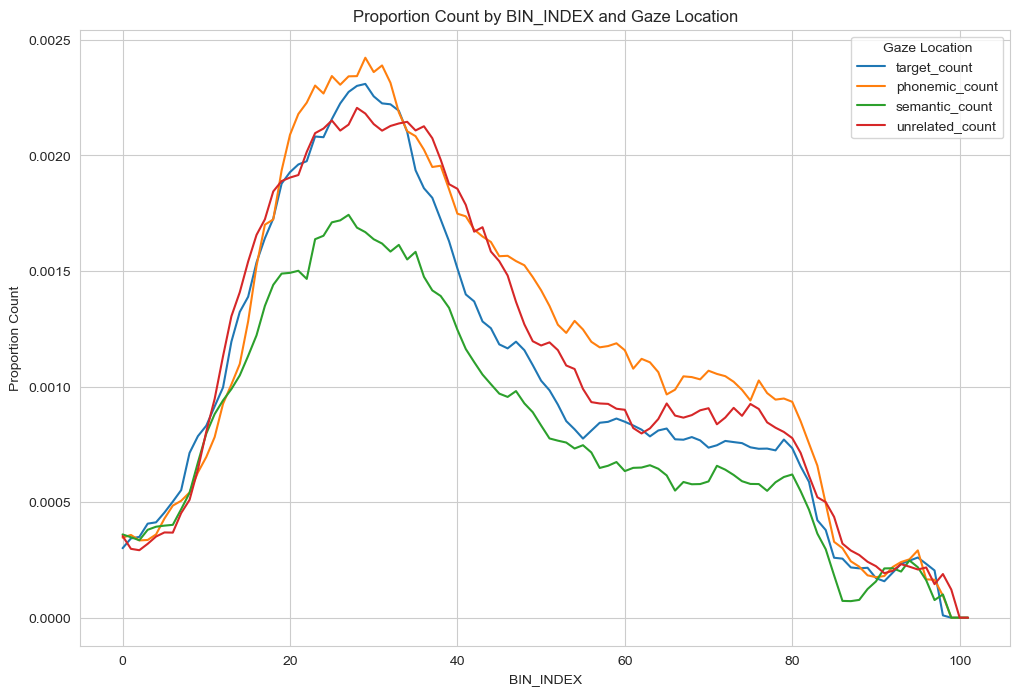

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

merged_long_form = pd.read_csv('gca_data.csv')

# Setting the style
sns.set_style("whitegrid")

# Create the plot
plt.figure(figsize=(12, 8))
sns.lineplot(data=merged_long_form, x="BIN_INDEX", y="proportion_count", hue="gaze_location", ci=None)

plt.title("Proportion Count by BIN_INDEX and Gaze Location")
plt.ylabel("Proportion Count")
plt.xlabel("BIN_INDEX")
plt.legend(title="Gaze Location")
plt.show()


C:\Users\alexa\AppData\Local\r-miniconda\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\alexa\AppData\Local\r-miniconda\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\alexa\AppData\Local\r-miniconda\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\alexa\AppData\Local\r-miniconda\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\alexa\AppData\Local\r-miniconda\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` f

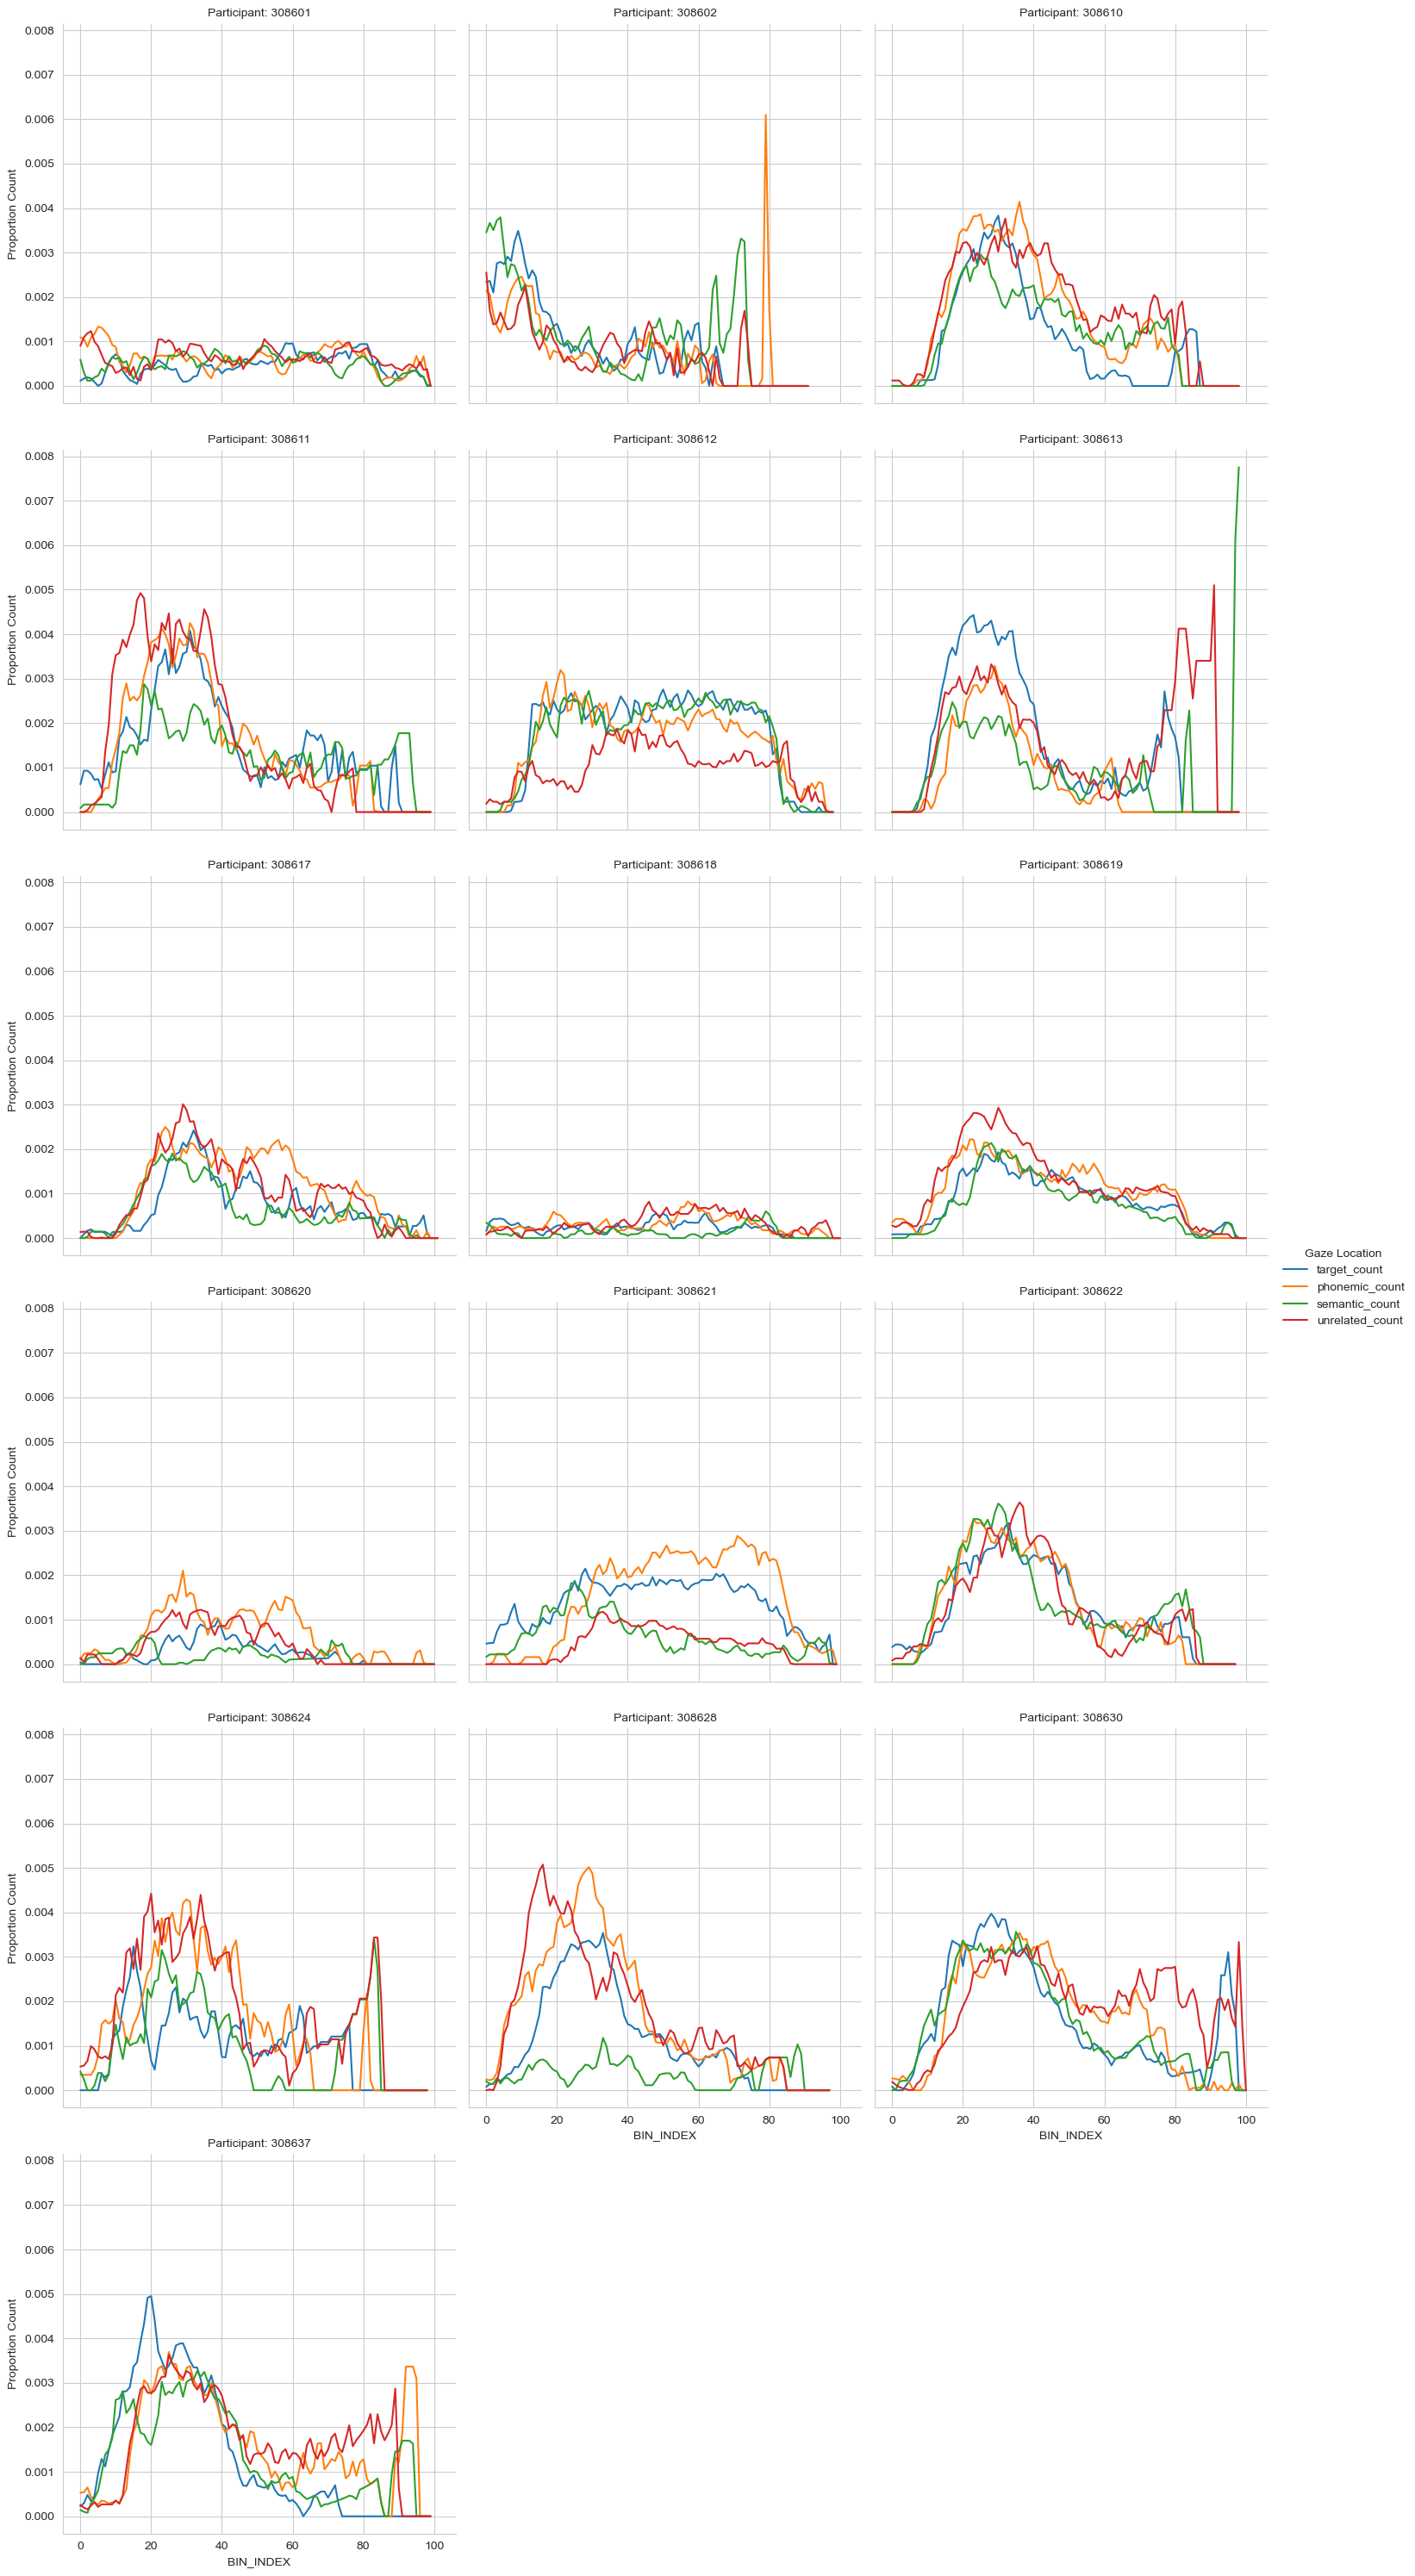

In [20]:
# Create a FacetGrid for each participant
g = sns.FacetGrid(merged_long_form, col="participant", col_wrap=3, height=5, sharey=True, sharex=True)
g.map_dataframe(sns.lineplot, x="BIN_INDEX", y="proportion_count", hue="gaze_location", ci=None)

# Adjust the axes and legends
g.set_axis_labels("BIN_INDEX", "Proportion Count")
g.set_titles("Participant: {col_name}")
g.add_legend(title="Gaze Location")

plt.show()


In [53]:
merged_long_form.to_csv('gca_data.csv', index = False)

In [58]:
df = merged_long_form

### Need to remove certain data from dataset